In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

In [2]:
# Load your dataset
# Assume the dataset is in a CSV file
df = pd.read_csv('ML_Data_48.csv')

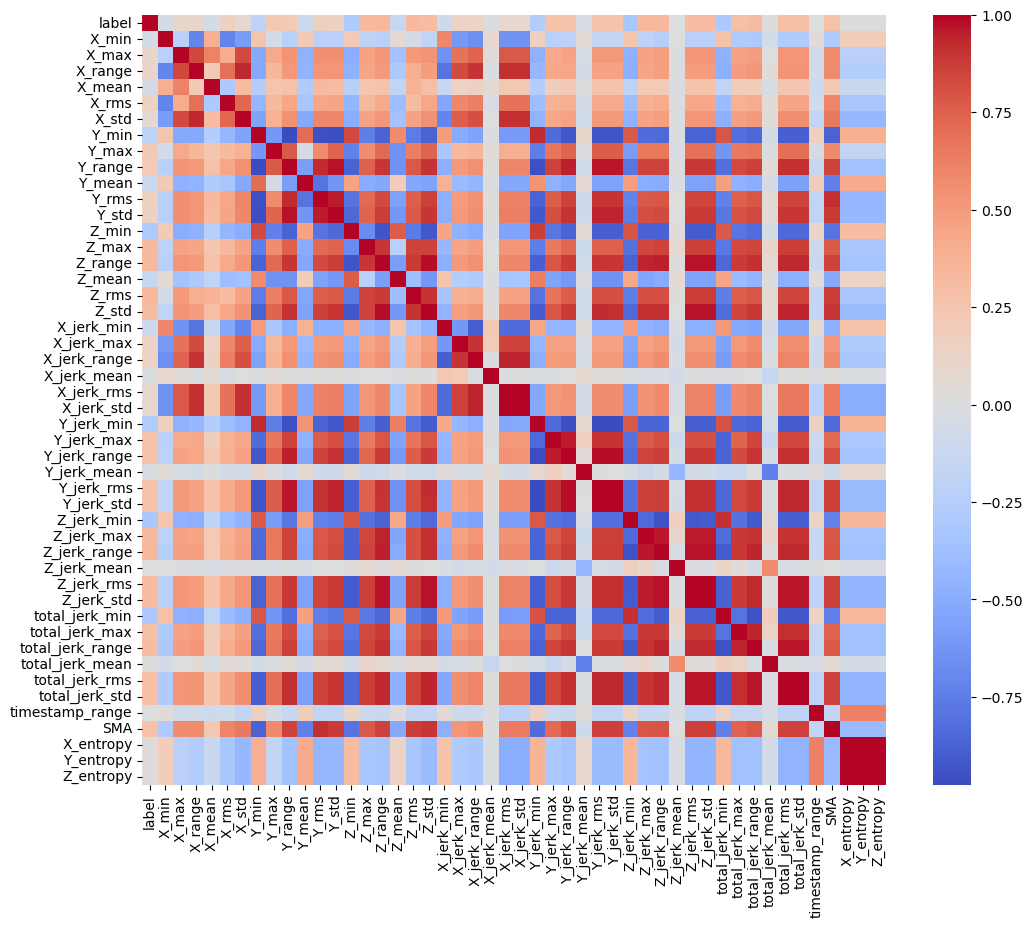

In [3]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [4]:
# Identify highly correlated features
threshold = 0.8
high_corr_var = np.where(np.abs(corr_matrix) > threshold)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

print("Highly correlated features (threshold > 0.8):")
for pair in high_corr_var:
    print(pair)

Highly correlated features (threshold > 0.8):
('X_max', 'X_range')
('X_max', 'X_std')
('X_range', 'X_std')
('X_range', 'X_jerk_max')
('X_range', 'X_jerk_range')
('X_range', 'X_jerk_rms')
('X_range', 'X_jerk_std')
('X_std', 'X_jerk_range')
('X_std', 'X_jerk_rms')
('X_std', 'X_jerk_std')
('Y_min', 'Y_range')
('Y_min', 'Y_rms')
('Y_min', 'Y_std')
('Y_min', 'Z_min')
('Y_min', 'Z_range')
('Y_min', 'Z_std')
('Y_min', 'Y_jerk_min')
('Y_min', 'Y_jerk_max')
('Y_min', 'Y_jerk_range')
('Y_min', 'Y_jerk_rms')
('Y_min', 'Y_jerk_std')
('Y_min', 'Z_jerk_max')
('Y_min', 'Z_jerk_range')
('Y_min', 'Z_jerk_rms')
('Y_min', 'Z_jerk_std')
('Y_min', 'total_jerk_max')
('Y_min', 'total_jerk_range')
('Y_min', 'total_jerk_rms')
('Y_min', 'total_jerk_std')
('Y_min', 'SMA')
('Y_range', 'Y_rms')
('Y_range', 'Y_std')
('Y_range', 'Z_min')
('Y_range', 'Z_range')
('Y_range', 'Z_std')
('Y_range', 'Y_jerk_min')
('Y_range', 'Y_jerk_max')
('Y_range', 'Y_jerk_range')
('Y_range', 'Y_jerk_rms')
('Y_range', 'Y_jerk_std')
('Y_r

In [5]:
# Feature importance using RandomForest
X = df.drop('label', axis=1)  # Assuming 'target' is the target column
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

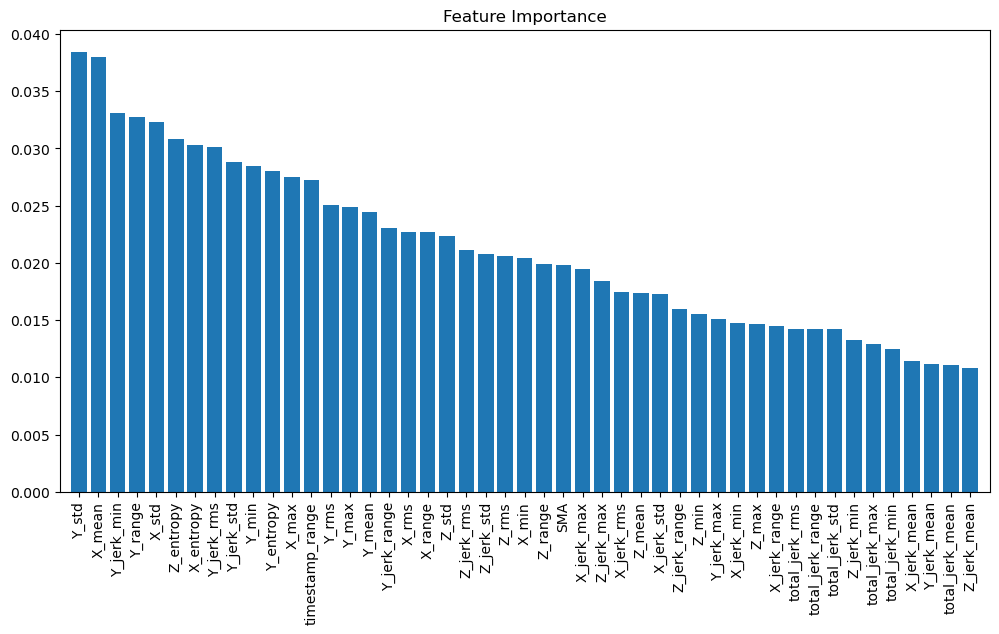

In [8]:
# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

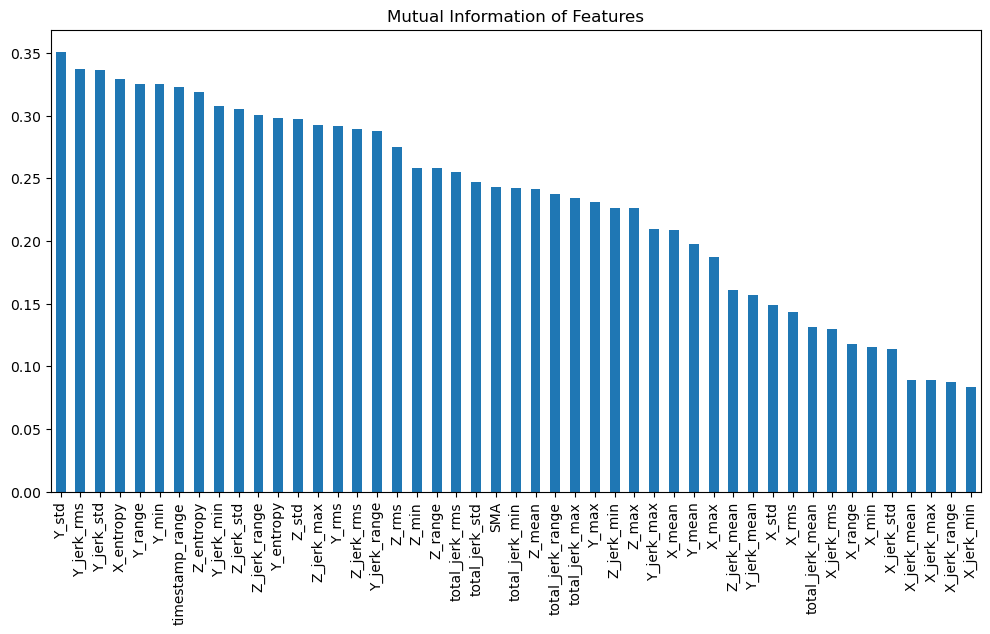

In [9]:
# Feature importance using mutual information
mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi, index=X.columns)
mi.sort_values(ascending=False).plot.bar(figsize=(12, 6))
plt.title("Mutual Information of Features")
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.feature_selection import SelectKBest, chi2

In [13]:
k = 47  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
selector.fit(X_train,y_train)

SelectKBest(k=47, score_func=<function chi2 at 0x75ebffa368e0>)

In [14]:
# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

In [15]:
scores = selector.scores_[selected_indices]

In [16]:
# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({'Feature': selected_features, 'Chi2 Score': scores})
feature_scores = feature_scores.sort_values(by='Chi2 Score', ascending=False)

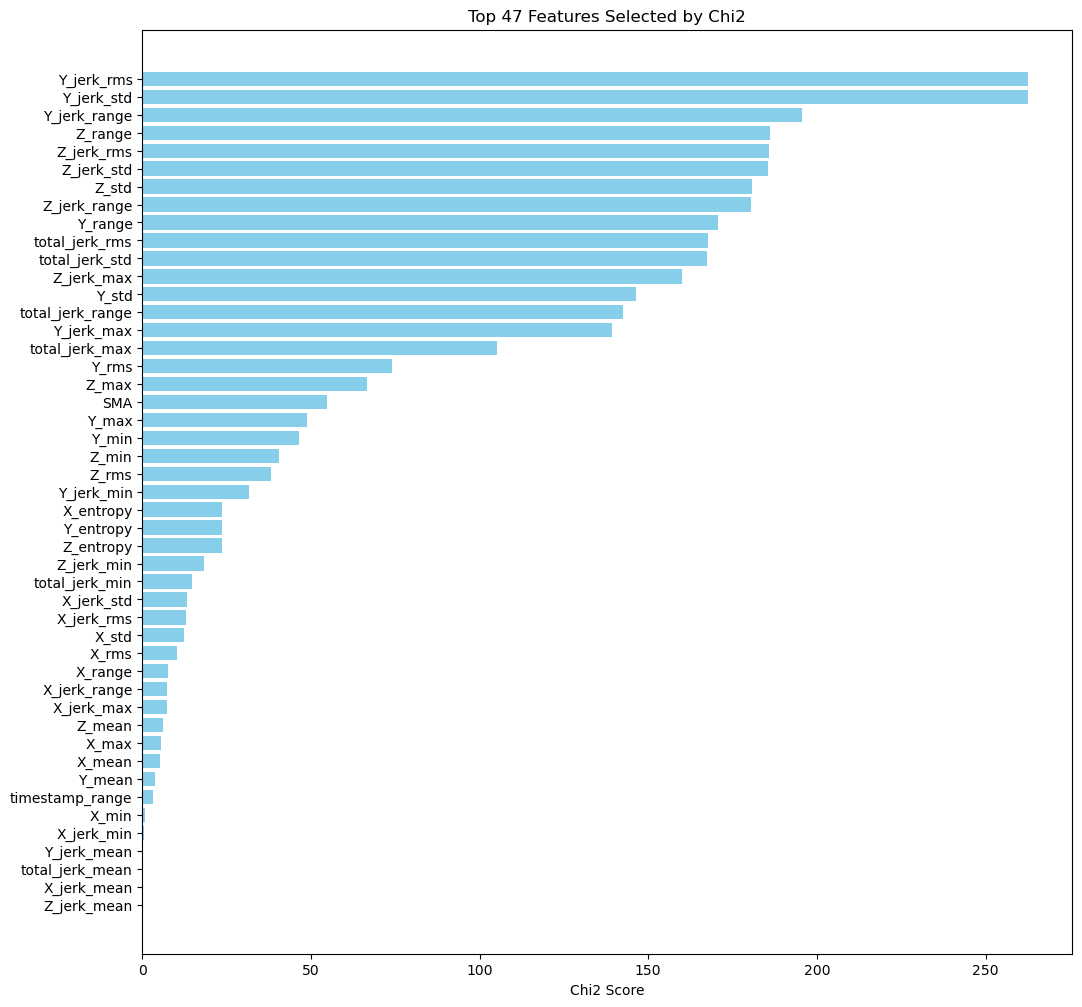

In [17]:
# Plot the Chi2 scores
plt.figure(figsize=(12, 12))
plt.barh(feature_scores['Feature'], feature_scores['Chi2 Score'], color='skyblue')
plt.xlabel('Chi2 Score')
plt.title('Top {} Features Selected by Chi2'.format(k))
plt.gca().invert_yaxis()
plt.savefig('Chi_Square.png')
plt.show()

In [18]:
print("Selected Features:")
print(feature_scores)

Selected Features:
             Feature  Chi2 Score
28        Y_jerk_rms  262.580022
29        Y_jerk_std  262.532075
26      Y_jerk_range  195.557210
14           Z_range  186.084063
34        Z_jerk_rms  185.712591
35        Z_jerk_std  185.388311
17             Z_std  180.733955
32      Z_jerk_range  180.354797
8            Y_range  170.810667
40    total_jerk_rms  167.717203
41    total_jerk_std  167.430820
31        Z_jerk_max  160.018126
11             Y_std  146.250352
38  total_jerk_range  142.433858
25        Y_jerk_max  139.140595
37    total_jerk_max  105.282344
10             Y_rms   74.157572
13             Z_max   66.687912
43               SMA   54.785816
7              Y_max   48.862421
6              Y_min   46.550655
12             Z_min   40.495714
16             Z_rms   38.309721
24        Y_jerk_min   31.534686
44         X_entropy   23.711898
45         Y_entropy   23.711898
46         Z_entropy   23.711898
30        Z_jerk_min   18.379353
36    total_jerk_min   1